In [11]:
import pandas as pd
from jiwer import wer
import matplotlib.pyplot as plt


### Not normalized Whisper SNR (just a work code for deleted code)

In [20]:
df_not_norm = pd.read_parquet('full_testing_df.parquet.gzip')

In [21]:
df_audios = pd.read_parquet('full_dataframe_with_noises.parquet.gzip')
df_audios

,audioname,dataset,ref_orig,sampling_rate,audiopath_local,audiopath_project,noise_path,noise_class
0,mozilla-common_voice_15-23-train-2856-01818,mozilla-common_voice_15-23,"Jest także trzecia sprawa, która w czasie tej ...",16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold2\156893-7-9-0.wav,jackhammer
1,pjatk-clarin_studio-15-train-0457-00001,pjatk-clarin_studio-15,dżuma wziernik przemianę księdzu krzywdzen...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\UrbanSound8K\audio\fold1\40722-8-0-4.wav,siren
2,pjatk-clarin_mobile-15-train-0083-00007,pjatk-clarin_mobile-15,w piątek po południu była przesłuchiwana przez...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_mobile...,.\data\UrbanSound8K\audio\fold8\125678-7-0-4.wav,jackhammer
3,pwr-maleset-unk-train-0001-03097,pwr-maleset-unk,jeśli chcesz zostanę w domu,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pwr-maleset-unk-tra...,.\data\UrbanSound8K\audio\fold9\105029-7-2-16.wav,jackhammer
4,mozilla-common_voice_15-23-train-2862-00017,mozilla-common_voice_15-23,Tekst nie opiera się na żadnych podstawach nau...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold10\99192-4-0-54.wav,drilling
...,...,...,...,...,...,...,...,...
4995,mailabs-corpus_librivox-19-train-2023-00011,mailabs-corpus_librivox-19,Nareszcie zniecierpliwiony kazał zamurować okn...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mailabs-corpus_libr...,.\data\VISC Dataset SON\7 (249).wav,crossover_interior
4996,pjatk-clarin_studio-15-train-0289-00016,pjatk-clarin_studio-15,dostała za ten reportaż nagrodę pulicera ...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\VISC Dataset SON\2 (172).wav,minibus_interior
4997,mozilla-common_voice_15-23-train-2846-00448,mozilla-common_voice_15-23,Dotyczy ona zasadniczo dwóch kwestii,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\VISC Dataset SON\5 (164).wav,jeep_interior
4998,pjatk-clarin_mobile-15-train-0035-00018,pjatk-clarin_mobile-15,każdy starał się odlecieć najbliższym samolote...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_mobile...,.\data\VISC Dataset SON\6 (638).wav,truck_interior


In [22]:
df_audios['whisper_without_noise'] = df_not_norm['whisper_no_noise']

In [23]:
df_not_norm

,audioname,dataset,ref_orig,sampling_rate,audiopath_local,audiopath_project,noise_path,noise_class,whisper_no_noise,whisper_SNR_100,whisper_SNR_10,whisper_SNR_1,audiofile_mixed,whisper_SNR_-3
0,mozilla-common_voice_15-23-train-2856-01818,mozilla-common_voice_15-23,"Jest także trzecia sprawa, która w czasie tej ...",16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold2\156893-7-9-0.wav,jackhammer,"Jest także trzecia sprawa, która w czasie tej...",rycerze moi współbracia boleśni bardzośmy mał...,"Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m...",fair-mls-20-train-0009-00038,"Rycerze moi, współbracia boleśni, Bardzośmy m..."
1,pjatk-clarin_studio-15-train-0457-00001,pjatk-clarin_studio-15,dżuma wziernik przemianę księdzu krzywdzen...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\UrbanSound8K\audio\fold1\40722-8-0-4.wav,siren,"Dżuma, wziernik, przemianę, księdzu, krzywdze...",kantor choć guza dostał wpośród czoła gdy pos...,"Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ...",fair-mls-20-train-0009-00044,"Kantor, choć guza dostał w pośród czoła, gdy ..."
2,pjatk-clarin_mobile-15-train-0083-00007,pjatk-clarin_mobile-15,w piątek po południu była przesłuchiwana przez...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_mobile...,.\data\UrbanSound8K\audio\fold8\125678-7-0-4.wav,jackhammer,w piątek po południu była przesłuchiwana prze...,przeszłe przypadki gdy dobrze pamięta zmyśla ...,"Przeszłe przypadki, gdy dobrze pamięta Zmyśla...","Przeszły przypadki, gdy dobrze pamięta, Myśla...",fair-mls-20-train-0009-00067,"Przeszło przypadki, gdy dobrze pamięta, myśli..."
3,pwr-maleset-unk-train-0001-03097,pwr-maleset-unk,jeśli chcesz zostanę w domu,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pwr-maleset-unk-tra...,.\data\UrbanSound8K\audio\fold9\105029-7-2-16.wav,jackhammer,Jeśli chcesz zostanę w domu.,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,fair-mls-20-train-0009-00079,"Nie przykrzy własnym hołdownikom, Ani swemu m..."
4,mozilla-common_voice_15-23-train-2862-00017,mozilla-common_voice_15-23,Tekst nie opiera się na żadnych podstawach nau...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold10\99192-4-0-54.wav,drilling,Tekst nie opiera się na żadnych podstawach na...,pięknież to przecie patrzeć na świat z góry w...,"Pięknież to przecie patrzeć na świat z góry, ...","Pięknież to przecie patrzyć na świat z góry, ...",fair-mls-20-train-0009-00080,"Piękny, że to przecie patrzyć na świat z góry..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,mailabs-corpus_librivox-19-train-2023-00011,mailabs-corpus_librivox-19,Nareszcie zniecierpliwiony kazał zamurować okn...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mailabs-corpus_libr...,.\data\VISC Dataset SON\7 (249).wav,crossover_interior,Nareszcie zniecierpliwiony kazał zamurować ok...,Duże litery.,Duże litery.,W tłu że litery.,pwr-viu-unk-train-0001-04231,Służę literę.
4996,pjatk-clarin_studio-15-train-0289-00016,pjatk-clarin_studio-15,dostała za ten reportaż nagrodę pulicera ...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\VISC Dataset SON\2 (172).wav,minibus_interior,"Dostała zatem reportaż nagrodę Pulitzera, ale...",Duże litery.,Duże litery.,Duże litery.,pwr-viu-unk-train-0001-04241,Duże litery.
4997,mozilla-common_voice_15-23-train-2846-00448,mozilla-common_voice_15-23,Dotyczy ona zasadniczo dwóch kwestii,16000,C:\Users\Eryk\.cache\huggingface\datasets\down

In [24]:
import pandas as pd

# Assuming your dataframe is named df
# Replace df with the actual name of your dataframe if different

# Create a new dataframe for 'audioname' and 'ref_orig'
df_audioname = df_audios[['audioname', 'ref_orig','whisper_without_noise','noise_class']].drop_duplicates()

# Create a new dataframe for 'audiofile_mixed' and 'SNR_100'
df_audiofile = df_not_norm[['audiofile_mixed', 'whisper_SNR_100','whisper_SNR_10','whisper_SNR_1','whisper_SNR_-3']].drop_duplicates()

# Merge the two dataframes on 'audioname' and 'audiofile_mixed'
result_df = pd.merge(df_audioname, df_audiofile, how='outer', left_on='audioname', right_on='audiofile_mixed')

# Drop the redundant column and rename columns
result_df = result_df.drop(columns=['audiofile_mixed']).rename(columns={'ref_orig': 'sentences'})

# Display the result_df
print(result_df)

                         audioname  \
0     fair-mls-20-train-0009-00038   
1     fair-mls-20-train-0009-00044   
2     fair-mls-20-train-0009-00067   
3     fair-mls-20-train-0009-00079   
4     fair-mls-20-train-0009-00080   
...                            ...   
4995  pwr-viu-unk-train-0001-04231   
4996  pwr-viu-unk-train-0001-04241   
4997  pwr-viu-unk-train-0001-04251   
4998  pwr-viu-unk-train-0001-04261   
4999  pwr-viu-unk-train-0001-04267   

                                              sentences  \
0     rycerze moi współ bracia boleśni bardzośmy mał...   
1     kantor choć guza dostał wpośród czoła gdy post...   
2     przeszłe przypadki gdy dobrze pamięta zmyśla g...   
3     nie przykrzy własnym hołdownikom ani swemu mon...   
4     nieskończenie pięknieżto przecie patrzać na św...   
...                                                 ...   
4995                                        duże litery   
4996                                        duże litery   
4997        

In [25]:
result_df

,audioname,sentences,whisper_without_noise,noise_class,whisper_SNR_100,whisper_SNR_10,whisper_SNR_1,whisper_SNR_-3
0,fair-mls-20-train-0009-00038,rycerze moi współ bracia boleśni bardzośmy mał...,rycerze moi współbracia boleśni bardzośmy mał...,minibus_interior,rycerze moi współbracia boleśni bardzośmy mał...,"Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m..."
1,fair-mls-20-train-0009-00044,kantor choć guza dostał wpośród czoła gdy post...,kantor choć guza dostał wpośród czoła gdy pos...,siren,kantor choć guza dostał wpośród czoła gdy pos...,"Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ..."
2,fair-mls-20-train-0009-00067,przeszłe przypadki gdy dobrze pamięta zmyśla g...,przeszłe przypadki gdy dobrze pamięta zmyśla ...,jackhammer,przeszłe przypadki gdy dobrze pamięta zmyśla ...,"Przeszłe przypadki, gdy dobrze pamięta Zmyśla...","Przeszły przypadki, gdy dobrze pamięta, Myśla...","Przeszło przypadki, gdy dobrze pamięta, myśli..."
3,fair-mls-20-train-0009-00079,nie przykrzy własnym hołdownikom ani swemu mon...,nie przykrzy własnym hołdownikom ani swemu mo...,crossover_interior,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,"Nie przykrzy własnym hołdownikom, Ani swemu m..."
4,fair-mls-20-train-0009-00080,nieskończenie pięknieżto przecie patrzać na św...,pięknież to przecie patrzeć na świat z góry w...,sports_car_interior,pięknież to przecie patrzeć na świat z góry w...,"Pięknież to przecie patrzeć na świat z góry, ...","Pięknież to przecie patrzyć na świat z góry, ...","Piękny, że to przecie patrzyć na świat z góry..."
...,...,...,...,...,...,...,...,...
4995,pwr-viu-unk-train-0001-04231,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,W tłu że litery.,Służę literę.
4996,pwr-viu-unk-train-0001-04241,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,Duże litery.,Duże litery.
4997,pwr-viu-unk-train-0001-04251,małe litery,Małe litery.,car_horn,Małe litery.,Małe litery.,mała litarz,Mała literka.
4998,pwr-viu-unk-train-0001-04261,małe litery,Małe litele.,drilling,Małe litele.,Mała Litera,Mało mi wcale.,Mało mi tego.


In [26]:
#saving all work to parquet
result_df.to_parquet('./data/parquets/not_normalized.parquet.gzip', compression = 'gzip')

### Whisper not normalized

In [27]:
df_not_norm = pd.read_parquet('./data/parquets/not_normalized.parquet.gzip')

In [28]:
df_not_norm

,audioname,sentences,whisper_without_noise,noise_class,whisper_SNR_100,whisper_SNR_10,whisper_SNR_1,whisper_SNR_-3
0,fair-mls-20-train-0009-00038,rycerze moi współ bracia boleśni bardzośmy mał...,rycerze moi współbracia boleśni bardzośmy mał...,minibus_interior,rycerze moi współbracia boleśni bardzośmy mał...,"Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m..."
1,fair-mls-20-train-0009-00044,kantor choć guza dostał wpośród czoła gdy post...,kantor choć guza dostał wpośród czoła gdy pos...,siren,kantor choć guza dostał wpośród czoła gdy pos...,"Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ..."
2,fair-mls-20-train-0009-00067,przeszłe przypadki gdy dobrze pamięta zmyśla g...,przeszłe przypadki gdy dobrze pamięta zmyśla ...,jackhammer,przeszłe przypadki gdy dobrze pamięta zmyśla ...,"Przeszłe przypadki, gdy dobrze pamięta Zmyśla...","Przeszły przypadki, gdy dobrze pamięta, Myśla...","Przeszło przypadki, gdy dobrze pamięta, myśli..."
3,fair-mls-20-train-0009-00079,nie przykrzy własnym hołdownikom ani swemu mon...,nie przykrzy własnym hołdownikom ani swemu mo...,crossover_interior,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,"Nie przykrzy własnym hołdownikom, Ani swemu m..."
4,fair-mls-20-train-0009-00080,nieskończenie pięknieżto przecie patrzać na św...,pięknież to przecie patrzeć na świat z góry w...,sports_car_interior,pięknież to przecie patrzeć na świat z góry w...,"Pięknież to przecie patrzeć na świat z góry, ...","Pięknież to przecie patrzyć na świat z góry, ...","Piękny, że to przecie patrzyć na świat z góry..."
...,...,...,...,...,...,...,...,...
4995,pwr-viu-unk-train-0001-04231,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,W tłu że litery.,Służę literę.
4996,pwr-viu-unk-train-0001-04241,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,Duże litery.,Duże litery.
4997,pwr-viu-unk-train-0001-04251,małe litery,Małe litery.,car_horn,Małe litery.,Małe litery.,mała litarz,Mała literka.
4998,pwr-viu-unk-train-0001-04261,małe litery,Małe litele.,drilling,Małe litele.,Mała Litera,Mało mi wcale.,Mało mi tego.


In [29]:
snr_list = ['whisper_without_noise', 'whisper_SNR_100',	'whisper_SNR_10','whisper_SNR_1','whisper_SNR_-3']
for snr_column in snr_list:
    wer = load("wer")
    snr_value_string = '_'.join(snr_column.split('_')[2:3])
    wer_score = wer.compute(predictions=df_not_norm[snr_column], references=df_not_norm['sentences'])
    print( f"Whisper model WER score for {snr_value_string}: {round(wer_score * 100,4)}")

Whisper model WER score for noise: 18.2771
Whisper model WER score for 100: 19.3506
Whisper model WER score for 10: 27.7929
Whisper model WER score for 1: 36.7453
Whisper model WER score for -3: 47.3158


### Whisper SNR evaluation

In [54]:
df_audio = pd.read_parquet('./data/parquets/Whisper_SNR_WER.gzip')

In [55]:
df_audio

,audioname,dataset,ref_orig,sampling_rate,audiopath_bigos,audiopath_local,noise_path,noise_class,normalised_audio_path,normalised_noise_path,...,audio_SNR_-10_path,WER_audio_SNR_100_path,WER_audio_SNR_50_path,WER_audio_SNR_25_path,WER_audio_SNR_10_path,WER_audio_SNR_5_path,WER_audio_SNR_0.1_path,WER_audio_SNR_-1_path,WER_audio_SNR_-3_path,WER_audio_SNR_-10_path
0,fair-mls-20-train-0009-04739,fair-mls-20,tam nocne włóczęgi wołano z dachów jeżeli nie ...,16000,fair-mls-20-train-0009-04739.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold9\79089-0-0-106.wav,air_conditioner,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,...,./data/mixed_recordings/SNR_-10\fair-mls-20-tr...,hej wy tam nocnemarki wołano z dachów jeżeli ...,hej wy tam nocnemarki wołano z dachów jeżeli ...,"Hej, wy tam, nocne marki! wołano z dachów. Je...","— Hej, wy tam, nocne marki! — wołano z dachów...","Hej, wy tam, nocne marki! Wołamy z dachu. Jeż...","Hej, byj tam, nocne marki! Chyła mu z dachu. ...","Hej, witam, Nocne Marki! Chyba nie zdarzył. J...","Hej, witam, Marcin. Nie mam uwagi. Jeżeli nie...",Dzięki za oglądanie!
1,pjatk-clarin_studio-15-train-0488-00003,pjatk-clarin_studio-15,w pracy studenci chcieliby przede wszystk...,16000,pjatk-clarin_studio-15-train-0488-00003.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold10\167750-4-1-0.wav,drilling,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,...,./data/mixed_recordings/SNR_-10\pjatk-clarin_s...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,Pracy studenci chcieliby przede wszystkim ods...,Pracy studenci chcieliby przede wszystkim odb...,Pracy studentów chcieliby przede wszystkim od...,Przede wszystkim chcieliby studenci realizowa...,Dziękuję.
2,fair-mls-20-train-0009-05501,fair-mls-20,co to znaczy sam siebie zapytywał faraon czy g...,16000,fair-mls-20-train-0009-05501.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold3\165039-7-5-0.wav,jackhammer,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,...,./data/mixed_recordings/SNR_-10\fair-mls-20-tr...,co to znaczy sam siebie zapytywał faraon czy ...,co to znaczy sam siebie zapytywał faraon czy ...,co to znaczy sam siebie zapytywał faraon czy ...,Co to znaczy? sam siebie zapytywał Faraon. Cz...,Co to znaczy? sam siebie zapytał Faraon. Czy ...,Co to znaczy? Sam siebie zapytał paraon. Czy ...,To co znasz? Tam siebie zapytował paraon. Prz...,"Otóż, pan się wychowywał parami przy koło lud...",Dziękuje za oglądanie.
3,fair-mls-20-train-0021-01519,fair-mls-20,tylko na piaszczystem wybrzeżu lub na łąkach b...,16000,fair-mls-20-train-0021-01519.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold1\57320-0-0-22.wav,air_conditioner,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,...,./data/mixed_recordings/SNR_-10\fair-mls-20-tr...,tylko na piaszczystem wybrzeżu lub na łąkach ...,tylko na piaszczystem wybrzeżu lub na łąkach ...,Tylko na piaszczystym wybrzeżu lub na łąkach ...,Tylko na piaszczystym wybrzeżu lub na łąkach ...,Tylko na piaszczystym wybrzeżu lub na łąkach ...,Tylko na piaszczystym wybrzeżu lub na łąkach ...,Tylko na piaszczystym wybrzeżu lub na łąkach ...,Tylko na piaszczystym wybrzeżu lub na łąkach ...,Tylko na piaszczystym wybrzeżu lub na łąkach ...
4,pjatk-clarin_studio-15-train-0335-00001,pjatk-clarin_studio-15,zaokrągla uziemienie księdzu liźnięcie rol...,16000,pjatk-clarin_studio-15-train-0335-00001.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold4\146709-0-0-20.wav,air_conditioner,./data/mixed_recordings/normalised_recordings/...,./

In [ ]:
print(df_audio.columns.to_list())

In [8]:
snr_list = ['WER_audio_SNR_100_path', 'WER_audio_SNR_50_path', 'WER_audio_SNR_25_path', 'WER_audio_SNR_10_path', 'WER_audio_SNR_5_path', 'WER_audio_SNR_0.1_path', 'WER_audio_SNR_-1_path', 'WER_audio_SNR_-3_path', 'WER_audio_SNR_-10_path']
for snr_column in snr_list:
    wer = load("wer")
    snr_value_string = '_'.join(snr_column.split('_')[2:4])
    wer_score = wer.compute(predictions=df_audio[snr_column], references=df_audio['ref_orig'])
    print( f"Whisper model WER score for {snr_value_string}: {round(wer_score * 100,4)}")

Whisper model WER score for SNR_100: 19.3399
Whisper model WER score for SNR_50: 19.584
Whisper model WER score for SNR_25: 22.4602
Whisper model WER score for SNR_10: 28.2408
Whisper model WER score for SNR_5: 32.7553
Whisper model WER score for SNR_0.1: 42.6143
Whisper model WER score for SNR_-1: 46.2866
Whisper model WER score for SNR_-3: 54.5155
Whisper model WER score for SNR_-10: 98.1438


### Evaluating wav2wec

In [2]:
df_wav2wec = pd.read_parquet('./data/parquets/wav2wec_wer.parquet.gzip')

In [3]:
df_audio = pd.read_parquet('./data/parquets/Whisper_SNR_WER.gzip')
df_wav2wec['noise_class'] = df_audio['noise_class']

In [4]:
# Compute WER for each column
for column in df_wav2wec.columns:
    if column.startswith('Wav2wec_'):
        wer_column_name = column.replace('Wav2wec_', 'WER_')
        df_wav2wec[wer_column_name] = df_wav2wec.apply(lambda row: 100 * wer(row['sentences'], row[column]), axis=1)

# Descriptive statistics for WER columns
wer_columns = [col for col in df_wav2wec.columns if col.startswith('WER_')]
descriptive_stats = df_wav2wec[wer_columns].describe()

# Compute mean excluding top 5% and bottom 5%
mean_excluding_outliers = df_wav2wec[wer_columns].apply(lambda x: x[(x >= x.quantile(0.05)) & (x <= x.quantile(0.95))].mean())
descriptive_stats.loc['mean without 5%'] = mean_excluding_outliers

# Count of zero values in each WER column
zero_counts = (df_wav2wec[wer_columns] == 0).sum()
descriptive_stats.loc['Perfect outputs'] = zero_counts


# Count of rows with WER under 10 (Very good)
count_very_good = ((df_wav2wec[wer_columns] > 0) & (df_wav2wec[wer_columns] < 10)).sum()
descriptive_stats.loc['Very good outputs'] = count_very_good

# Count of rows with WER under 20 (Acceptable)
count_acceptable = ((df_wav2wec[wer_columns] >= 10) & (df_wav2wec[wer_columns] < 20)).sum()
descriptive_stats.loc['Acceptable outputs'] = count_acceptable

# Print descriptive statistics
print(descriptive_stats)


                    WER_SNR_100   WER_SNR_50   WER_SNR_25   WER_SNR_10  \
count               2500.000000  2500.000000  2500.000000  2500.000000   
mean                  27.557004    27.682574    29.244426    42.246047   
std                   24.624945    24.500584    25.815924    29.312902   
min                    0.000000     0.000000     0.000000     0.000000   
25%                   13.333333    13.333333    14.285714    24.000000   
50%                   23.333333    23.333333    25.000000    38.461538   
75%                   36.111111    36.363636    37.500000    55.195100   
max                  460.000000   480.000000   480.000000   580.000000   
mean without 5%       24.219229    24.328375    25.484668    40.306119   
Perfect outputs      179.000000   179.000000   158.000000    90.000000   
Very good outputs    255.000000   249.000000   225.000000    83.000000   
Acceptable outputs   574.000000   572.000000   534.000000   288.000000   

                      WER_SNR_5  WER_

In [7]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame from being truncated
pd.set_option('display.precision', 4) 

# Group by noise_class and compute statistics for each group
wer_by_noise_class = df_wav2wec.groupby('noise_class')[wer_columns].describe()

# Print statistics for each noise class
wer_by_noise_class.to_csv('describe_output.csv')
print("\nWord Error Rate statistics by noise class:")
print(wer_by_noise_class)


Word Error Rate statistics by noise class:
                    WER_SNR_100                                                             WER_SNR_50                                                             WER_SNR_25                                                             WER_SNR_10                                                             WER_SNR_5                                                             WER_SNR_0.1                                                               WER_SNR_-1                                                               
                          count     mean      std  min      25%      50%      75%       max      count     mean      std  min      25%      50%      75%       max      count     mean      std  min      25%      50%      75%       max      count     mean      std  min      25%      50%      75%       max     count     mean      std  min      25%      50%      75%       max       count     mean      std   min      25%      50%     

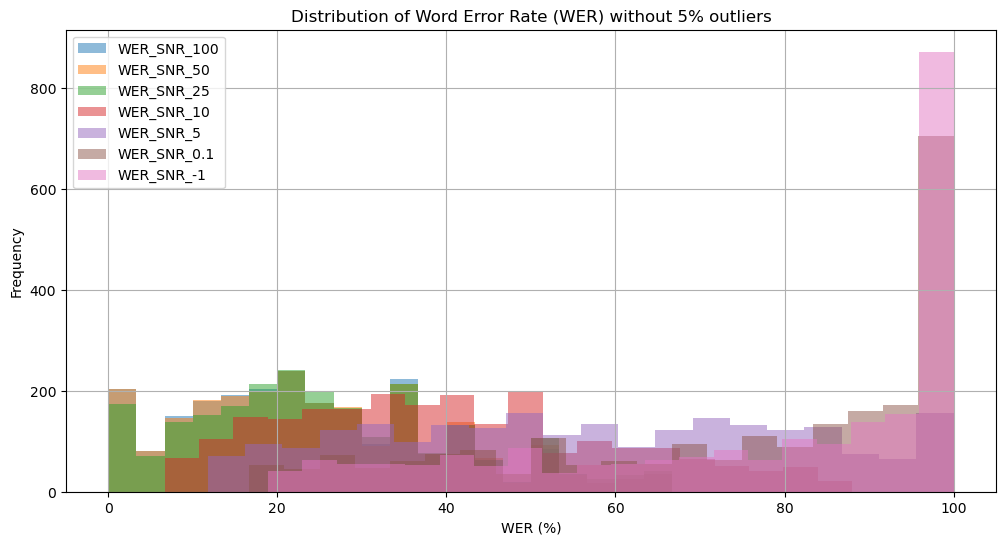

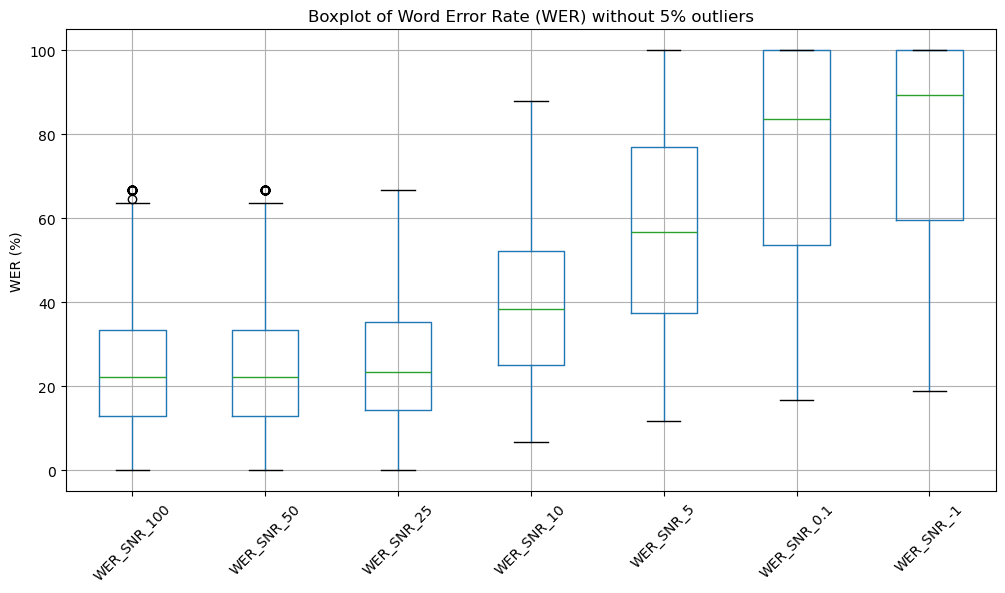

C:\Users\Eryk\AppData\Local\Temp\ipykernel_18008\2162775132.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_wer_values[column], label=column, shade=True)
c:\Users\Eryk\anaconda3\envs\Magisterka\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Eryk\AppData\Local\Temp\ipykernel_18008\2162775132.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_wer_values[column], label=column, shade=True)
c:\Users\Eryk\anaconda3\envs\Magisterka\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

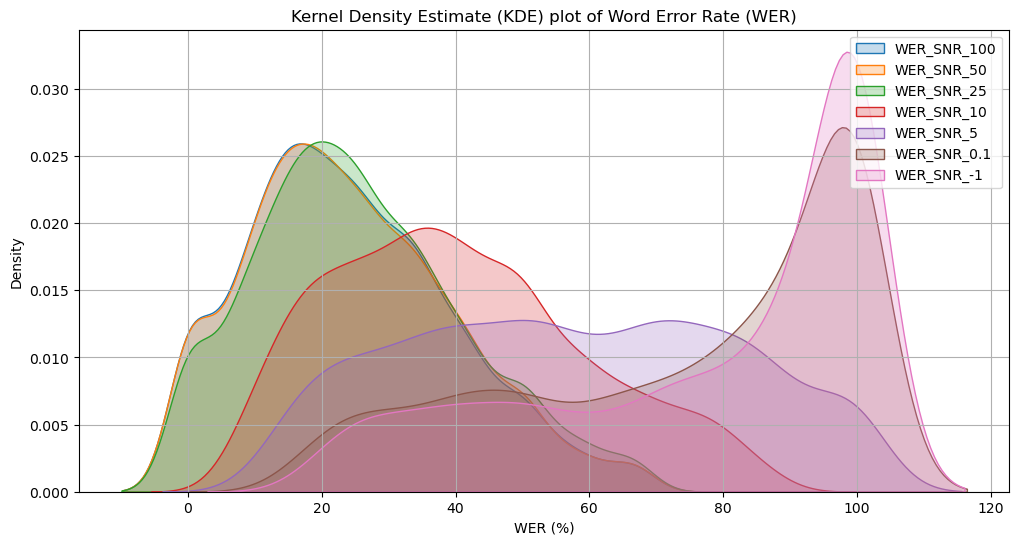

In [6]:
import matplotlib.pyplot as plt

# Filter WER values excluding the 5% lower and upper outliers
filtered_wer_values = df_wav2wec[wer_columns].apply(lambda x: x[(x >= x.quantile(0.05)) & (x <= x.quantile(0.95))])

# Plot histograms for WER columns without outliers
plt.figure(figsize=(12, 6))
for column in wer_columns:
    plt.hist(filtered_wer_values[column], bins=20, alpha=0.5, label=column)

plt.title('Distribution of Word Error Rate (WER) without 5% outliers')
plt.xlabel('WER (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot box plots for WER columns without outliers
plt.figure(figsize=(12, 6))
filtered_wer_values.boxplot()
plt.title('Boxplot of Word Error Rate (WER) without 5% outliers')
plt.ylabel('WER (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

import seaborn as sns

# Plot KDE plot for WER columns without outliers
plt.figure(figsize=(12, 6))
for column in wer_columns:
    sns.kdeplot(filtered_wer_values[column], label=column, shade=True)

plt.title('Kernel Density Estimate (KDE) plot of Word Error Rate (WER)')
plt.xlabel('WER (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
df['WER_SNR_100'].sort_values()

2252      0.0
2188      0.0
2392      0.0
2190      0.0
445       0.0
        ...  
1645    200.0
2419    275.0
708     300.0
2082    312.5
1683    460.0
Name: WER_SNR_100, Length: 2500, dtype: float64

In [32]:
df.loc[708]

audio_name         pwr-viu-unk-train-0001-01219.wav
sentences                                    cofnij
Wav2wec_SNR_100                            co w nij
Wav2wec_SNR_50                              co wnij
Wav2wec_SNR_25                             kto wnij
Wav2wec_SNR_10                              ktownij
WER_SNR_100                                   300.0
WER_SNR_50                                    200.0
WER_SNR_25                                    200.0
WER_SNR_10                                    100.0
Name: 708, dtype: object

In [10]:
df = df_wav2wec
snr_list = ['Wav2wec_SNR_100', 'Wav2wec_SNR_50','Wav2wec_SNR_25', 'Wav2wec_SNR_10']
for snr_column in snr_list:
    wer = load("wer")
    wer_score = wer.compute(predictions=df[snr_column], references=df['sentences'])
    print( f"Whisper model WER score for {snr_column}: {round(wer_score * 100,4)}")

Whisper model WER score for Wav2wec_SNR_100: 23.4883
Whisper model WER score for Wav2wec_SNR_50: 23.5924
Whisper model WER score for Wav2wec_SNR_25: 25.0105
Whisper model WER score for Wav2wec_SNR_10: 38.5499


### Evaluating Whisper v3

In [10]:
df_whisper = pd.read_parquet('./data/parquets/Whisper_SNR_WER.gzip')
df_whisper

,audioname,dataset,ref_orig,sampling_rate,audiopath_bigos,audiopath_local,noise_path,noise_class,normalised_audio_path,normalised_noise_path,audio_SNR_100_path,audio_SNR_50_path,audio_SNR_25_path,audio_SNR_10_path,audio_SNR_5_path,audio_SNR_0.1_path,audio_SNR_-1_path,audio_SNR_-3_path,audio_SNR_-10_path,WER_audio_SNR_100_path,WER_audio_SNR_50_path,WER_audio_SNR_25_path,WER_audio_SNR_10_path,WER_audio_SNR_5_path,WER_audio_SNR_0.1_path,WER_audio_SNR_-1_path,WER_audio_SNR_-3_path,WER_audio_SNR_-10_path
0,fair-mls-20-train-0009-04739,fair-mls-20,tam nocne włóczęgi wołano z dachów jeżeli nie ...,16000,fair-mls-20-train-0009-04739.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold9\79089-0-0-106.wav,air_conditioner,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/SNR_100\fair-mls-20-tr...,./data/mixed_recordings/SNR_50\fair-mls-20-tra...,./data/mixed_recordings/SNR_25\fair-mls-20-tra...,./data/mixed_recordings/SNR_10\fair-mls-20-tra...,./data/mixed_recordings/SNR_5\fair-mls-20-trai...,./data/mixed_recordings/SNR_0.1\fair-mls-20-tr...,./data/mixed_recordings/SNR_-1\fair-mls-20-tra...,./data/mixed_recordings/SNR_-3\fair-mls-20-tra...,./data/mixed_recordings/SNR_-10\fair-mls-20-tr...,hej wy tam nocnemarki wołano z dachów jeżeli ...,hej wy tam nocnemarki wołano z dachów jeżeli ...,"Hej, wy tam, nocne marki! wołano z dachów. Je...","— Hej, wy tam, nocne marki! — wołano z dachów...","Hej, wy tam, nocne marki! Wołamy z dachu. Jeż...","Hej, byj tam, nocne marki! Chyła mu z dachu. ...","Hej, witam, Nocne Marki! Chyba nie zdarzył. J...","Hej, witam, Marcin. Nie mam uwagi. Jeżeli nie...",Dzięki za oglądanie!
1,pjatk-clarin_studio-15-train-0488-00003,pjatk-clarin_studio-15,w pracy studenci chcieliby przede wszystk...,16000,pjatk-clarin_studio-15-train-0488-00003.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold10\167750-4-1-0.wav,drilling,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/SNR_100\pjatk-clarin_s...,./data/mixed_recordings/SNR_50\pjatk-clarin_st...,./data/mixed_recordings/SNR_25\pjatk-clarin_st...,./data/mixed_recordings/SNR_10\pjatk-clarin_st...,./data/mixed_recordings/SNR_5\pjatk-clarin_stu...,./data/mixed_recordings/SNR_0.1\pjatk-clarin_s...,./data/mixed_recordings/SNR_-1\pjatk-clarin_st...,./data/mixed_recordings/SNR_-3\pjatk-clarin_st...,./data/mixed_recordings/SNR_-10\pjatk-clarin_s...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,Pracy studenci chcieliby przede wszystkim ods...,Pracy studenci chcieliby przede wszystkim odb...,Pracy studentów chcieliby przede wszystkim od...,Przede wszystkim chcieliby studenci realizowa...,Dziękuję.
2,fair-mls-20-train-0009-05501,fair-mls-20,co to znaczy sam siebie zapytywał faraon czy g...,16000,fair-mls-20-train-0009-05501.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold3\165039-7-5-0.wav,jackhammer,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/SNR_100\fair-mls-20-tr...,./data/mixed_recordings/SNR_50\fair-mls-20-tra...,./data/mixed_recordings/SNR_25\fair-mls-20-tra...,./data/mixed_recordings/SNR_10\fair-mls-20-tra...,./data/mixed_recordings/SNR_5\fair-mls-20-trai...,./data/mixed_recordings/SNR_0.1\fair-mls-20-tr...,./data/mixed_recordings/SNR_-1\fair-mls-20-tra...,./data/mixed_recordings/SNR_-3\fair-mls-20-tra...,./data/mixed_recordings/SNR_-10\fair-mls-20-tr...,co to znaczy sam siebie zapytywał faraon czy ...,co to znaczy sam siebie zapytywał faraon czy ...,co to znaczy sam siebie zapytywał faraon czy ...,Co to znaczy? sam siebie zapytywał Faraon. Cz...,Co to znaczy? sam siebie zapytał Faraon. Czy ...,Co to znaczy? 

In [13]:
# Compute WER for each column
for column in df_whisper.columns:
    if column.startswith('WER_audio_SNR_'):
        wer_column_name = column.replace('WER_audio_SNR_', 'WER_whisper_')
        df_whisper[wer_column_name] = df_whisper.apply(lambda row: 100 * wer(row['ref_orig'], row[column]), axis=1)

# Descriptive statistics for WER columns
wer_columns = [col for col in df_whisper.columns if col.startswith('WER_whisper_')]
descriptive_stats = df_whisper[wer_columns].describe()

# Compute mean excluding top 5% and bottom 5%
mean_excluding_outliers = df_whisper[wer_columns].apply(lambda x: x[(x >= x.quantile(0.05)) & (x <= x.quantile(0.95))].mean())
descriptive_stats.loc['mean without 5%'] = mean_excluding_outliers

# Count of zero values in each WER column
zero_counts = (df_whisper[wer_columns] == 0).sum()
descriptive_stats.loc['Perfect outputs'] = zero_counts


# Count of rows with WER under 10 (Very good)
count_very_good = ((df_whisper[wer_columns] > 0) & (df_whisper[wer_columns] < 10)).sum()
descriptive_stats.loc['Very good outputs'] = count_very_good

# Count of rows with WER under 20 (Acceptable)
count_acceptable = ((df_whisper[wer_columns] >= 10) & (df_whisper[wer_columns] < 20)).sum()
descriptive_stats.loc['Acceptable outputs'] = count_acceptable

# Print descriptive statistics
print(descriptive_stats)

                    WER_whisper_100_path  WER_whisper_50_path  WER_whisper_25_path  WER_whisper_10_path  WER_whisper_5_path  WER_whisper_0.1_path  WER_whisper_-1_path  WER_whisper_-3_path  WER_whisper_-10_path
count                          2500.0000            2500.0000            2500.0000            2500.0000           2500.0000             2500.0000            2500.0000            2500.0000             2500.0000
mean                             23.6464              23.6940              25.5906              29.7855             33.9553               45.0230              50.8570              57.7472              100.6968
std                              26.1801              26.0241              25.2202              26.0255             27.3363               67.9543             128.5044             101.4617              199.0569
min                               0.0000               0.0000               0.0000               0.0000              0.0000                0.0000               

In [14]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent DataFrame from being truncated
pd.set_option('display.precision', 4) 

# Group by noise_class and compute statistics for each group
wer_by_noise_class = df_whisper.groupby('noise_class')[wer_columns].describe()

# Print statistics for each noise class
wer_by_noise_class.to_csv('whisper_describe_output.csv')
print("\nWord Error Rate statistics by noise class:")
print(wer_by_noise_class)


Word Error Rate statistics by noise class:
                    WER_whisper_100_path                                                          WER_whisper_50_path                                                          WER_whisper_25_path                                                             WER_whisper_10_path                                                             WER_whisper_5_path                                                             WER_whisper_0.1_path                                                               WER_whisper_-1_path                                                               WER_whisper_-3_path                                                               WER_whisper_-10_path                                                                      
                                   count     mean      std  min      25%      50%      75%    max               count     mean      std  min      25%      50%      75%    max               count     mean 